# Fire Detection Program
In this project, we will create one deep learning model that predicts through the images given to the program for the fire. As our Output will look like as an image with a text mention on it as "Fire" or "No_Fire". We have few images for our training purpose of the model, thanks to eduonix for providng us the with all necessary materials for this project. 
Throughout this, project we will explore the capabilities of deep learning algorithms and several libraries which makes our model more accurate and helps us to directly apply our images to the model.

# Importing the Important Libraries

In [161]:
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils #to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense,Flatten,Activation,Dropout

# Creating Constants

In [162]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE =(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
INIT_LR = 0.01
BATCH_SIZE =32
EPOCHS_NO = 50 
FAST_RUN = True
lr_find = True

# Data Preparation
Here we will import all the images for training of the model. As we have manually created two subfolders within the dataset folder and once again copied all the respective images of 'with fire' and 'without fire' into their respective folders.


In [163]:
# defining the classes of the images
classes= ['with_fire', 'without_fire']

# defining the path of the directories of both subfolders

fire = r'C:\Users\Asus\Dropbox\My PC (LAPTOP-Q5SI23RP)\Downloads\16271094\Fire_Detector\Fire\With_Fire'
no_fire = r'C:\Users\Asus\Dropbox\My PC (LAPTOP-Q5SI23RP)\Downloads\16271094\Fire_Detector\Fire\Without_Fire'

# creating an empty list that will store all the images and labels
images = []
label = []

for i in os.listdir(fire):
    image_path =os.path.join(fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([1,0]) #[1,0] for fire class
    
for i in os.listdir(no_fire):
    image_path =os.path.join(no_fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([0,1]) #[0,1] for non fire class
    
images = np.array(images, dtype='float64')/255 #here, we have converted the images list we got into an array and normalized each of its pixels.

label = np.array(label)
    
    

Choosing one Random Image to check if the code is working importing all the images properly. 

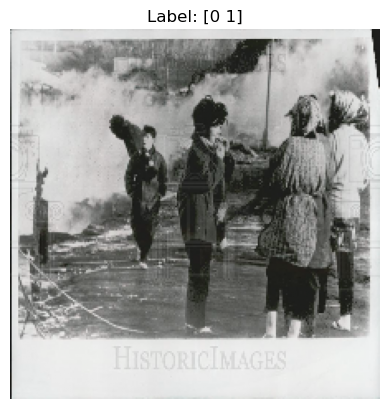

In [164]:
# Choose a random index
random_index = np.random.randint(len(images))

# Retrieve the random image and its corresponding label
random_image = images[random_index]
random_label = label[random_index]

# Display the image
plt.imshow(random_image)
plt.title('Label: {}'.format(random_label))
plt.axis('off')  # Hide axis
plt.show()

# Training Image Generator

In [165]:
train_gen =ImageDataGenerator(rotation_range = 20,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.3,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    height_shift_range = 0.3)

# Creating Our Model

In [176]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 7, 7, 256)           │              

 Total params: 6,952,546 (26.52 MB)

 Trainable params: 6,950,018 (26.51 MB)

 Non-trainable params: 2,528 (9.88 KB)

# Creating Callbacks

In [177]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# #creating callbacks

# #EarlyStop

# earlystop = EarlyStopping(monitor = 'val_accuracy', patience = 8)

# # reduce_LR
# learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 4, varbose = 1, factor = 0.5, min_lr = 0.0001)

# callbacks = [earlystop, learning_rate_reduction]

# Splitting The Data

In [178]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.50, shuffle=True, random_state=42)

In [179]:
X_train.shape

(85, 224, 224, 3)

In [180]:
epochs = 50


detection = model.fit(
    train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=50,
#     callbacks=callbacks
)

model.save('fire_detection.h5')

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5419 - loss: 1.0007 - val_accuracy: 0.2326 - val_loss: 0.8069
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 0.4688 - loss: 0.9545 - val_accuracy: 0.3605 - val_loss: 0.7103
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5729 - loss: 1.0832 - val_accuracy: 0.3721 - val_loss: 0.8003
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.4762 - loss: 0.8269 - val_accuracy: 0.5581 - val_loss: 0.6912
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4190 - loss: 1.2741 - val_accuracy: 0.7326 - val_loss: 0.6177
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.5312 - loss: 0.9760 - val_accuracy: 0.6977 - val_loss: 0.6342
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 932ms/step - accuracy: 0.6256 - loss: 0.9620 - val_accuracy: 0.7558 - val_loss: 0.6185
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.5312 - loss: 0.6387 - val_accuracy: 0.7674 - val_loss: 0.6135


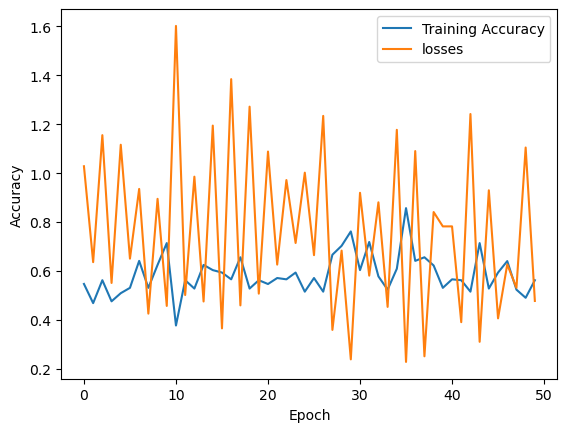

In [181]:
plt.plot(detection.history['accuracy'], label='Training Accuracy')
plt.plot(detection.history['loss'], label='losses')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

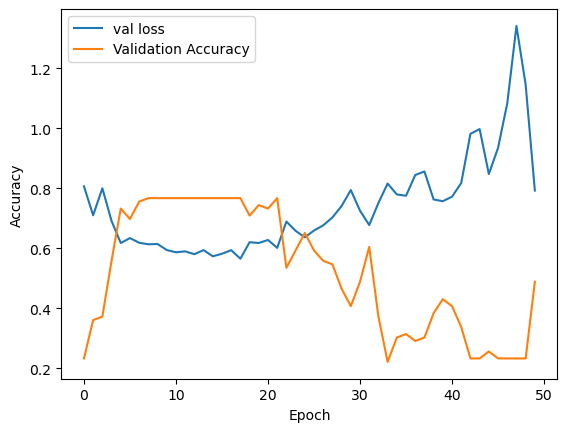

In [182]:
plt.plot(detection.history['val_loss'], label='val loss')
plt.plot(detection.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [191]:
test_dir = r'C:\Users\Asus\Dropbox\My PC (LAPTOP-Q5SI23RP)\Downloads\16271094\Fire_Detector\Fire'

test_img=os.listdir(test_dir)
for i in range(10):
    ran_img =random.choice(test_img)
    img_path =os.path.join(test_dir,ran_img)
    img =cv2.imread(img_path)
    img=cv2.resize(img,(IMAGE_HEIGHT, IMAGE_WIDTH))
    
    img_input = img.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)  # Reshape for model input
    pred = model.predict(img_input)
    predicted_class = 'fire' if pred[0][0]> pred[0][1] else 'no_fire'  # Assuming 0.5 threshold
    
    text = f'{predicted_class}'
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image with prediction
    cv2.imshow('Live predictions', img)
    cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
